### RLE with PyCuAmpcor

In [1]:
import numpy as np
import os
from glob import glob

from PyCuAmpcor import PyCuAmpcor

In [2]:
burst_id = 't107_227888_iw2'
path = 'stack/' + burst_id + '/*'
path_list = sorted(glob(path))
datelist = [i.split('/')[-1] for i in path_list]    #extracting dates from COMPASS CSLC products

In [3]:
proc_dates = datelist[60:90]    #selecting 30 dates for this notebook

txtfile = f'{burst_id}_proc.txt'
with open(txtfile, 'w') as f:
    for line in proc_dates:
        f.write(f"{line}\n")

In [4]:
#running RLE batch processing
maxTemp = 370 #maximum temporal baseline (days)
ww = 64 #window width 
wh = 64 #window height
snr = 10 #SNR threshold for choosing valid offsets
nwdc = 20 #number of windows processed in a chunk along lines
nwac = 20 #number of windows processed in a chunk along columns
outdir = 'OFFSETS' #output directory for offsets
pngfile = f'RLE_ts_{burst_id}.png'  #output image file
csvfile = f'RLE_ts_{burst_id}.csv'  #output csv file 

cmd = f'run_batch_offset.py --burstID {burst_id} --datefile {txtfile} --out_dir {outdir} --maxTemp {maxTemp} --ww {ww} --wh {wh} --nwdc {nwdc} --nwac {nwac} --snr {snr} --pngfile {pngfile} --csvfile {csvfile}'
print(cmd)
os.system(cmd)

run_batch_offset.py --burstID t107_227888_iw2 --datefile t107_227888_iw2_proc.txt --out_dir OFFSETS --maxTemp 370 --ww 64 --wh 64 --nwdc 20 --nwac 20 --snr 10 --pngfile RLE_ts_t107_227888_iw2.png --csvfile RLE_ts_t107_227888_iw2.csv
Using CUDA Device 1 ...
Opening reference image SLCDIR/20210109.slc.vrt...
Opening secondary image SLCDIR/20210202.slc.vrt...
Total number of windows (azimuth x range):  280 x 1280
to be processed in the number of chunks: 14 x 64
Processing chunks (1, x) - (1, x) out of 14
Using CUDA Device 3 ...
Opening reference image SLCDIR/20210109.slc.vrt...
Opening secondary image SLCDIR/20210226.slc.vrt...
Total number of windows (azimuth x range):  280 x 1280
to be processed in the number of chunks: 14 x 64
Processing chunks (1, x) - (1, x) out of 14
Using CUDA Device 6 ...
Opening reference image SLCDIR/20210109.slc.vrt...
Opening secondary image SLCDIR/20210403.slc.vrt...
Total number of windows (azimuth x range):  280 x 1280
to be processed in the number of chunk

0

(-0.5, 3637.5, 2557.5, -0.5)

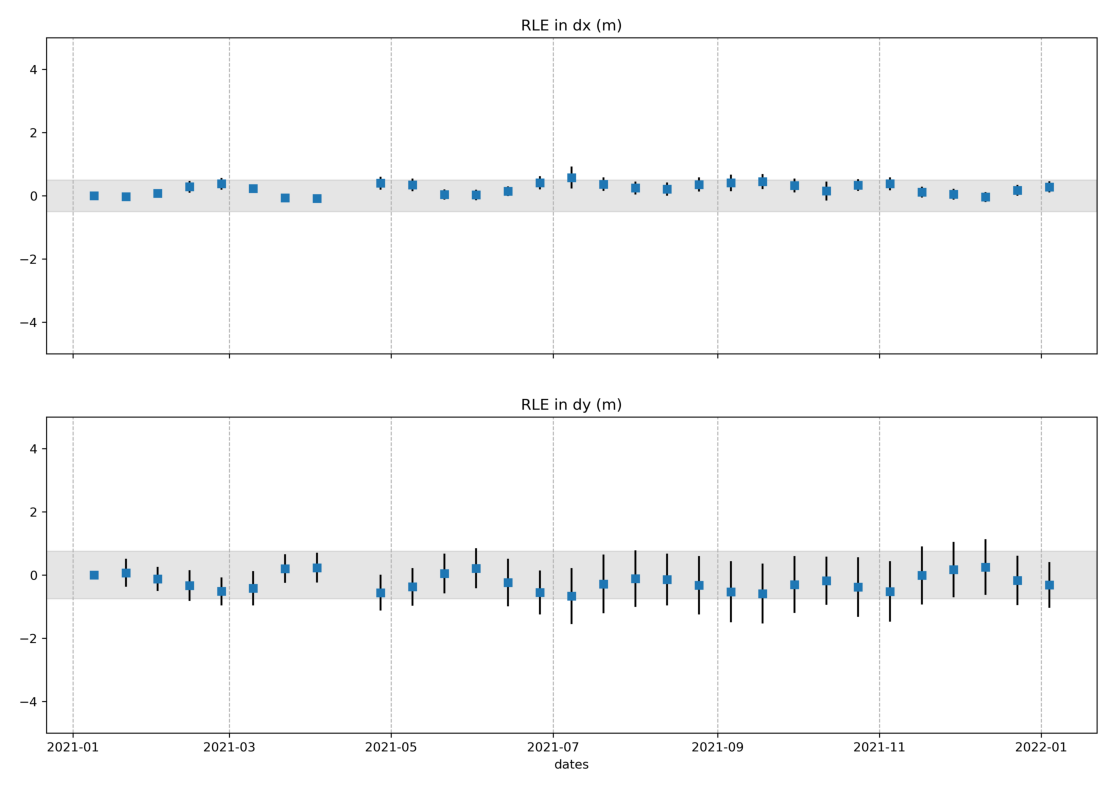

In [5]:
#dispalying time-series offset tracking results
import matplotlib.pyplot as plt
import matplotlib.image as img
im = img.imread(pngfile)

fig, ax = plt.subplots(figsize=(15,10), dpi=100)
ax.imshow(im)
ax.axis('off')